In [2]:
import json
import itertools
from Levenshtein import distance
import string
import re
import random
import time
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
docs_json = json.load(open('./cranfield/cran_docs.json', 'r'))[:]
doc_ids = [item['id'] for item in docs_json]
docs = [item['body'] for item in docs_json]


In [4]:
# Constructing the vocabulary
words = []
for doc in docs:
    words += re.sub("[^a-zA-Z]+", " ", doc).split()
vocab = list(set(words))

In [5]:
print(vocab[:10])

['formulate', 'german', 'discrepancy', 'carborundum', 'seeks', 'forcible', 'variously', 'originally', 'lunar', 'correlograms']


In [6]:
bigrams = list(itertools.product(string.ascii_lowercase, repeat=2))
bigram_vocab = [''.join(bigram) for bigram in bigrams]

def get_bigram(word):
    return [word[i:i+2] for i in range(len(word)-1)]

def get_bigram_distance(word1, word2):
    bigram1 = get_bigram(word1)
    bigram2 = get_bigram(word2)
    return distance(''.join(bigram1), ''.join(bigram2))

def get_closest_word(word, vocab, bigram_vocab):
    min_distance = 1000
    closest_word = ''
    for v in vocab:
        dist = get_bigram_distance(word, v)
        if dist < min_distance:
            min_distance = dist
            closest_word = v
    return closest_word

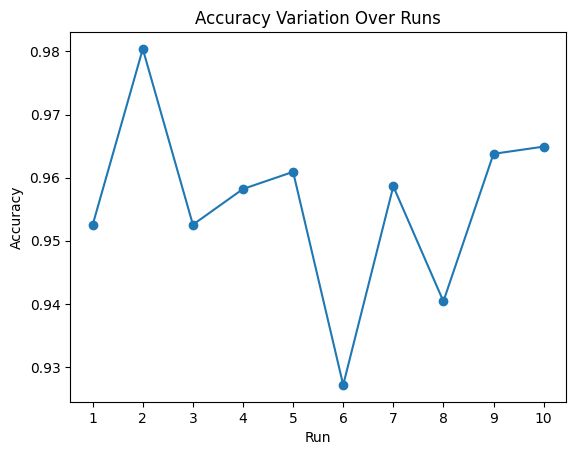

In [7]:
num_runs = 10
accuracies = []

for _ in range(num_runs):
    # Generate misspelled query words
    query_words = []
    correct_words = []
    for word in vocab[:100]:
        length = len(word)
        if length > 4:
            index = random.randint(0, length-1)
            if index + 1 < length:
                correct_words.append(word)
                correct_words.append(word)
                correct_words.append(word)
                query_words.append(word[:index] + random.choice(string.ascii_lowercase) + word[index+1:])
                query_words.append(word[:index] + random.choice(string.ascii_lowercase) + word[index:])
                query_words.append(word[:index] + word[index+1:])
                if index + 2 < length:
                    correct_words.append(word)
                    query_words.append(word[:index] + word[index+1] + word[index] + word[index+2:])

    # Spell check and evaluate accuracy
    correctly_corrected = 0
    for query_word in query_words:
        corrected_word = get_closest_word(query_word, vocab, bigram_vocab)
        if corrected_word == correct_words[query_words.index(query_word)]:
            correctly_corrected += 1

    accuracy = correctly_corrected / len(query_words)
    accuracies.append(accuracy)

# Plotting
plt.plot(range(1, num_runs + 1), accuracies, marker='o')
plt.title('Accuracy Variation Over Runs')
plt.xlabel('Run')
plt.ylabel('Accuracy')
plt.xticks(range(1, num_runs + 1))
plt.show()